In [5]:
import geopandas as gpd
#import os

#cwd = os.getcwd()
#print(cwd)
africa_rivers = gpd.read_file("data/africa_water/afrivs.shp")
#data source: http://gaia.geosci.unc.edu/rivers/

print(africa_rivers)


           cat     AREA  UP_CELLS  DISCHARGE  WIDTH  WIDTH5  WIDTH95  DEPTH  \
0            1    24.56       142       0.55   5.32    1.94    14.74   0.21   
1            2    34.98       199       0.79   6.38    2.32    17.81   0.25   
2            3    97.00       566       2.25  10.80    3.84    30.78   0.37   
3            4    74.98       111       1.72   9.45    3.38    26.81   0.33   
4            5   408.69       106       9.91  22.66    7.82    66.56   0.66   
...        ...      ...       ...        ...    ...     ...      ...    ...   
566428  566429   295.52       379       1.81   9.69    3.46    27.52   0.34   
566429  566430   676.00      1115      12.32  25.28    8.68    74.57   0.72   
566430  566431  1983.77       830      11.60  24.52    8.43    72.24   0.70   
566431  566432   802.29      1335       4.80  15.77    5.52    45.66   0.50   
566432  566433  1400.37       442       1.37   8.43    3.03    23.81   0.31   

        DEPTH5  DEPTH95   ARCID  \
0         0.10  

In [6]:
#data source countries: https://www.naturalearthdata.com/downloads/10m-cultural-vectors/
#data source lakes: https://www.naturalearthdata.com/downloads/10m-physical-vectors/
lakes = gpd.read_file("data/physical_lakes/ne_10m_lakes.shp")#load in data of lakes
country_shapefiles = gpd.read_file("data/culture_countries/ne_10m_admin_0_countries.shp")#load in country shape data
africa = country_shapefiles.loc[country_shapefiles['CONTINENT'] == 'Africa']#select countries in africa
africa_lakes = gpd.sjoin(lakes, africa, op='intersects')#get lacks that are in africa
africa_lakes = lakes.loc[lakes.index.isin(africa_lakes.index.tolist())]#get the lakes that are in africa again???
excluded_rivers = gpd.sjoin(africa_rivers, africa_lakes, op='within')#spatially join the lakes and rivers
africa_rivers = africa_rivers.loc[~africa_rivers.index.isin(excluded_rivers.index.tolist())]#remove rivers?? Idea is that we leave an empty region

c:\users\daniel\documents\python-maps\python-maps-venv\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
c:\users\daniel\documents\python-maps\python-maps-venv\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


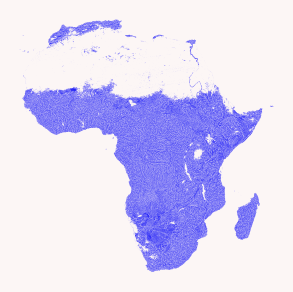

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(5, 7)

africa_rivers.plot(ax=ax, color='blue', lw=0.1)
africa_lakes.plot(ax=ax, color='#FCF6F5FF', alpha=1)#plot the lakes as blank/grey?

ax.axis('off')
plt.show()

c:\users\daniel\documents\python-maps\python-maps-venv\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
c:\users\daniel\documents\python-maps\python-maps-venv\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


(0.0, 1.0, 0.0, 1.0)

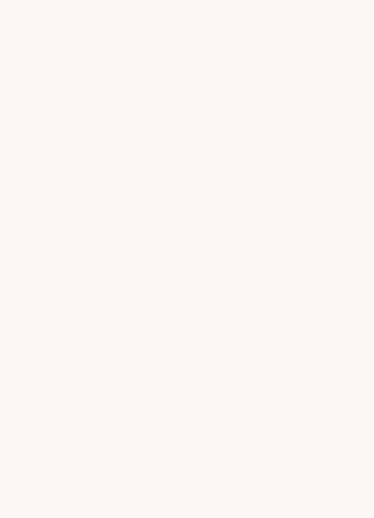

In [11]:
 #shows whats wrong with the river features in the lakes
     #DOESNT WORK I THINK COS WE REMOVED THE AFRICA RIVERS BROKEN STUFF
lake_victoria = africa_lakes.loc[africa_lakes['name'] == 'Lake Victoria']
 funny_features = gpd.sjoin(africa_rivers, lake_victoria, op='within')

 fig, ax = plt.subplots(facecolor='#FCF6F5FF')
 fig.set_size_inches(5, 7)

 #lake_victoria.plot(ax=ax, color='black', alpha=0.1)
 funny_features.plot(ax=ax, color='blue', lw=0.4, alpha=1)

 ax.axis('off')

In [21]:
#basins_lvl_one = gpd.read_file("data/africa_hydro_basins/hybas_af_lev01_v1c.shp")
#print(basins_lvl_one)

basins_lvl_two = gpd.read_file("data/africa_hydro_basins/hybas_af_lev02_v1c.shp")
#print(basins_lvl_two)
#basins_lvl_two.plot()

#basins_lvl_three = gpd.read_file("data/africa_hydro_basins/hybas_af_lev03_v1c.shp")
#print(basins_lvl_three)
#basins_lvl_three.plot()

#plt.show()

In [ ]:
rivers_basins = gpd.sjoin(africa_rivers, basins_lvl_two, op='intersects')

c:\users\daniel\documents\python-maps\python-maps-venv\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)

rivers_basins.plot(ax=ax, edgecolor='face', lw=0.1)
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

ax.axis('off')
plt.show()